In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

In [2]:
# Define the MLP model with ReLU activation
class Pytorch_MLP(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, hidden_size_3, num_classes):
        super(Pytorch_MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2)
        self.fc3 = nn.Linear(hidden_size_2, hidden_size_3)
        self.fc4 = nn.Linear(hidden_size_3, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.relu(out)
        out = self.fc4(out)
        return out

# Parameters
input_size = 784
hidden1_layer = 500
hidden2_layer = 250
hidden3_layer = 100
num_classes = 10
num_epochs = 15
batch_size = 64
learning_rate = 0.01

In [3]:
# MNIST Dataset (images and labels)
train_data = datasets.MNIST(root='data', train=True, transform=transforms.ToTensor(), download=True)
test_data = datasets.MNIST(root='data', train=False, transform=transforms.ToTensor(), download=True)



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 11170513.05it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 2023447.26it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3740029.98it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3202307.74it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
# Data loaders
train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)


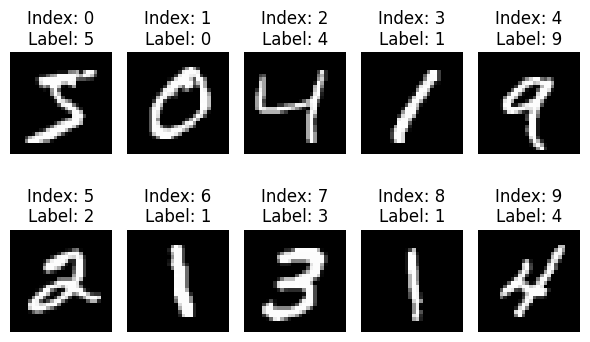

In [5]:
# Visualizing the data
fig, axes = plt.subplots(2, 5, figsize=(6, 4))  # 2 rows, 5 columns

for i in range(10):          # Loop through the first 10 images
  ax = axes[i // 5, i % 5]  # Determine the position of the subplot (row, column)

  ax.imshow(train_data.data[i], cmap='gray') # Display each image in grayscale
  ax.set_title(f"Index: {i}\nLabel: {train_data.targets[i].item()}")
  ax.axis('off')
plt.tight_layout() # Adjust layout to prevent overlap of titles
plt.show()

In [6]:
# Initialize the model, loss function, and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Pytorch_MLP(input_size, hidden1_layer, hidden2_layer, hidden3_layer, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [7]:
# For plotting
train_losses = []
test_losses = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_idx, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.view(-1, 28*28).to(device).float()  # Ensure images are float
        labels = labels.to(device)  # Keep labels as class indices

        outputs = model(images) # Forward pass
        loss = criterion(outputs, labels)

        optimizer.zero_grad() # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if (batch_idx + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{batch_idx + 1}/{len(train_loader)}], Loss: {loss.item():.4f}')

    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Average Training Loss: {avg_train_loss:.4f}')

    # Calculate test loss
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.view(-1, 28*28).to(device).float()  # Ensure images are float
            labels = labels.to(device)  # Keep labels as class indices
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

    avg_test_loss = test_loss / len(test_loader)
    test_losses.append(avg_test_loss)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Average Test Loss: {avg_test_loss:.4f}')


Epoch [1/15], Step [100/938], Loss: 0.0877
Epoch [1/15], Step [200/938], Loss: 0.1450
Epoch [1/15], Step [300/938], Loss: 0.3208
Epoch [1/15], Step [400/938], Loss: 0.1866
Epoch [1/15], Step [500/938], Loss: 0.0731
Epoch [1/15], Step [600/938], Loss: 0.1485
Epoch [1/15], Step [700/938], Loss: 0.3273
Epoch [1/15], Step [800/938], Loss: 0.0994
Epoch [1/15], Step [900/938], Loss: 0.3205
Epoch [1/15], Average Training Loss: 0.2757
Epoch [1/15], Average Test Loss: 0.1828
Epoch [2/15], Step [100/938], Loss: 0.1551
Epoch [2/15], Step [200/938], Loss: 0.1546
Epoch [2/15], Step [300/938], Loss: 0.0784
Epoch [2/15], Step [400/938], Loss: 0.2538
Epoch [2/15], Step [500/938], Loss: 0.1351
Epoch [2/15], Step [600/938], Loss: 0.2934
Epoch [2/15], Step [700/938], Loss: 0.1648
Epoch [2/15], Step [800/938], Loss: 0.1890
Epoch [2/15], Step [900/938], Loss: 0.1435
Epoch [2/15], Average Training Loss: 0.1668
Epoch [2/15], Average Test Loss: 0.1822
Epoch [3/15], Step [100/938], Loss: 0.2333
Epoch [3/15], S

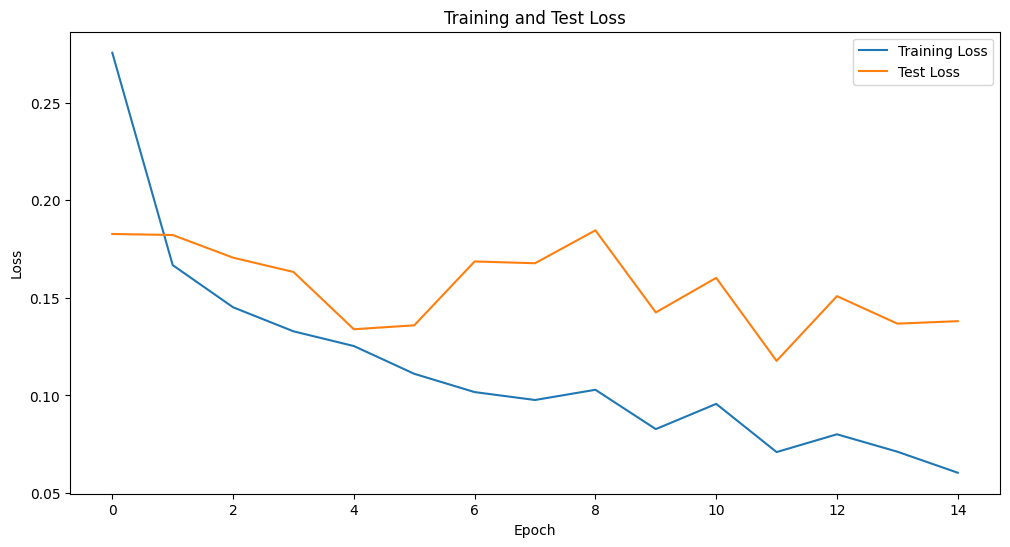

Test Accuracy: 97.30%


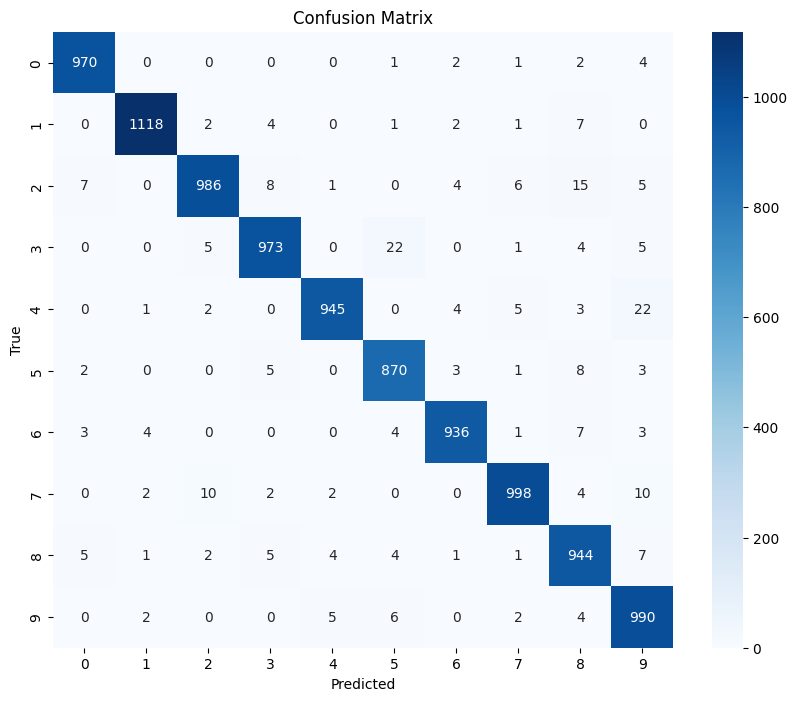

Training Accuracy: 98.86%


In [8]:
# Plot training and test loss
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()

# Testing loop
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    all_labels = []
    all_preds = []
    for images, labels in test_loader:
        images = images.view(-1, 28*28).to(device).float()  # Ensure images are float
        labels = labels.to(device)  # Keep labels as class indices
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

    test_accuracy = 100 * correct / total
    print(f'Test Accuracy: {test_accuracy:.2f}%')

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Training Accuracy
    correct_train = 0
    total_train = 0
    with torch.no_grad():
        for images, labels in train_loader:
            images = images.view(-1, 28*28).to(device).float()  # Ensure images are float
            labels = labels.to(device)  # Keep labels as class indices
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

    train_accuracy = 100 * correct_train / total_train
    print(f'Training Accuracy: {train_accuracy:.2f}%')

# Weight decay for L2 regularization

In [11]:
# Parameters
input_size = 784
hidden1_layer = 500
hidden2_layer = 250
hidden3_layer = 100
num_classes = 10
num_epochs = 15
batch_size = 64
learning_rate = 0.01
weight_decay = 0.001  # L2 regularization term

In [12]:
# Initialize the model, loss function, and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Pytorch_MLP(input_size, hidden1_layer, hidden2_layer, hidden3_layer, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

In [13]:
# For plotting
train_losses = []
test_losses = []


Epoch [1/15], Step [100/938], Loss: 0.4471
Epoch [1/15], Step [200/938], Loss: 0.4636
Epoch [1/15], Step [300/938], Loss: 0.3924
Epoch [1/15], Step [400/938], Loss: 0.5679
Epoch [1/15], Step [500/938], Loss: 0.2690
Epoch [1/15], Step [600/938], Loss: 0.3099
Epoch [1/15], Step [700/938], Loss: 0.1700
Epoch [1/15], Step [800/938], Loss: 0.1897
Epoch [1/15], Step [900/938], Loss: 0.0715
Epoch [1/15], Average Training Loss: 0.3153
Epoch [1/15], Average Test Loss: 0.2124
Epoch [2/15], Step [100/938], Loss: 0.1813
Epoch [2/15], Step [200/938], Loss: 0.1704
Epoch [2/15], Step [300/938], Loss: 0.0687
Epoch [2/15], Step [400/938], Loss: 0.2740
Epoch [2/15], Step [500/938], Loss: 0.4000
Epoch [2/15], Step [600/938], Loss: 0.1669
Epoch [2/15], Step [700/938], Loss: 0.3361
Epoch [2/15], Step [800/938], Loss: 0.2058
Epoch [2/15], Step [900/938], Loss: 0.2210
Epoch [2/15], Average Training Loss: 0.2275
Epoch [2/15], Average Test Loss: 0.2031
Epoch [3/15], Step [100/938], Loss: 0.1150
Epoch [3/15], S

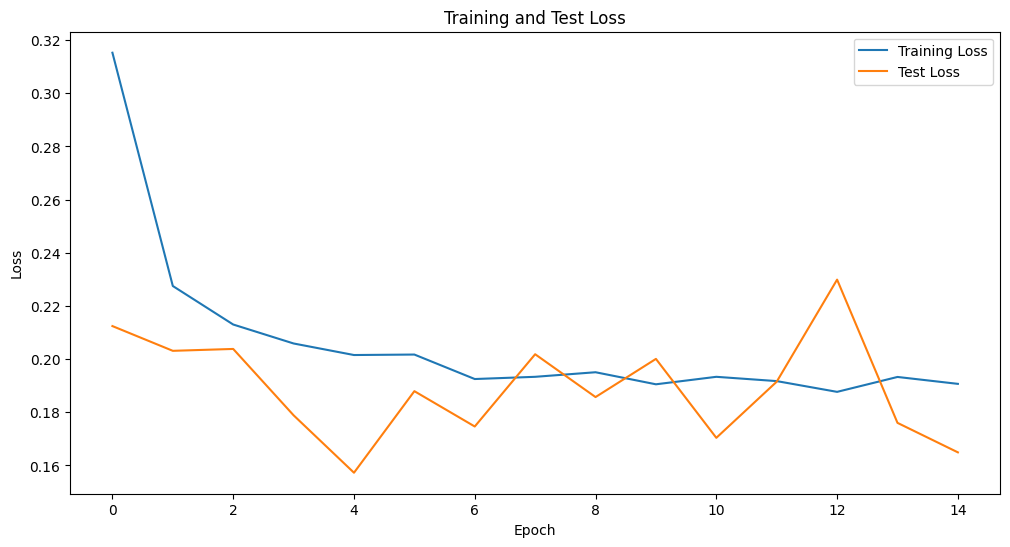

Test Accuracy: 95.13%


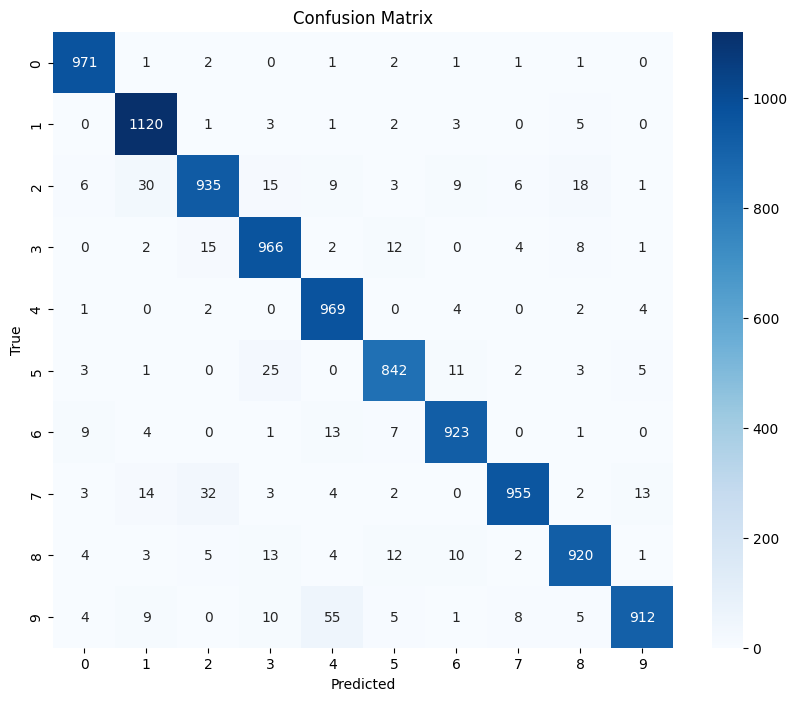

Training Accuracy: 95.22%


In [14]:
# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_idx, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.view(-1, 28*28).to(device).float()  # Ensure images are float
        labels = labels.to(device)  # Keep labels as class indices

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if (batch_idx + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{batch_idx + 1}/{len(train_loader)}], Loss: {loss.item():.4f}')

    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Average Training Loss: {avg_train_loss:.4f}')

    # Calculate test loss
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.view(-1, 28*28).to(device).float()  # Ensure images are float
            labels = labels.to(device)  # Keep labels as class indices
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

    avg_test_loss = test_loss / len(test_loader)
    test_losses.append(avg_test_loss)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Average Test Loss: {avg_test_loss:.4f}')

# Plot training and test loss
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()

# Testing loop
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    all_labels = []
    all_preds = []
    for images, labels in test_loader:
        images = images.view(-1, 28*28).to(device).float()  # Ensure images are float
        labels = labels.to(device)  # Keep labels as class indices
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

    test_accuracy = 100 * correct / total
    print(f'Test Accuracy: {test_accuracy:.2f}%')

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Training Accuracy
    correct_train = 0
    total_train = 0
    with torch.no_grad():
        for images, labels in train_loader:
            images = images.view(-1, 28*28).to(device).float()  # Ensure images are float
            labels = labels.to(device)  # Keep labels as class indices
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

    train_accuracy = 100 * correct_train / total_train
    print(f'Training Accuracy: {train_accuracy:.2f}%')
